<a href="https://colab.research.google.com/github/Mephod1y/DataScience/blob/main/HW5/Hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
drive.mount('/content/drive')
zip_file = '/content/drive/My Drive/homework.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

data_folder = 'data'

In [17]:
all_data = pd.DataFrame()

for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)
                data = pd.read_csv(file_path)
                data['Activity'] = folder_name
                all_data  = pd.concat([all_data , data], ignore_index=True)

In [18]:
all_data.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z,Activity
0,-1.517924,-5.214571,1.034295,walking
1,-3.677494,-8.724471,2.973599,walking
2,-10.989386,-13.584701,4.917691,walking
3,-3.457227,-7.522581,-0.584185,walking
4,-2.025495,-10.002975,-1.584961,walking


In [19]:
all_data.shape

(193860, 4)

In [26]:
X = all_data.drop('Activity', axis=1)
y = all_data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
svm_model = SVC()
rf_model = RandomForestClassifier()

svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Accuracy (SVM):", svm_accuracy)
print("Accuracy (Random Forest):", rf_accuracy)

Accuracy (SVM): 0.8963685133601568
Accuracy (Random Forest): 0.9998452491488703


In [22]:
from sklearn.metrics import classification_report

svm_report = classification_report(y_test, svm_pred)
print("SVM Results:")
print(svm_report)

rf_report = classification_report(y_test, rf_pred)
print("Random Forest Results:")
print(rf_report)

SVM Results:
              precision    recall  f1-score   support

        idle       0.96      0.98      0.97      6234
     running       0.93      0.91      0.92     20448
      stairs       1.00      0.00      0.00       990
     walking       0.80      0.91      0.85     11100

    accuracy                           0.90     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.90      0.89     38772

Random Forest Results:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6234
     running       1.00      1.00      1.00     20448
      stairs       1.00      1.00      1.00       990
     walking       1.00      1.00      1.00     11100

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



Висновок порівняння моделей SVM та Random Forest:

SVM-модель має доволі непогану точність класифікації (від 85-97%), але RandomForest-модель показує кращі результати (100% по всіх класах)


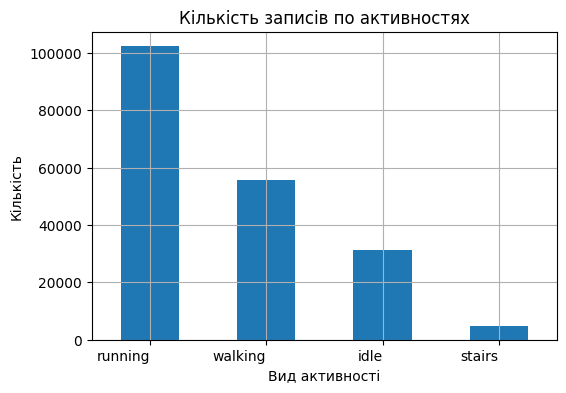

In [49]:
plt.figure(figsize=(6, 4))
all_records = all_data['Activity'].value_counts()
all_records.plot.bar()
plt.title('Кількість записів по активностях')
plt.xlabel('Вид активності')
plt.xticks(rotation=0, ha='right')
plt.ylabel('Кількість')
plt.grid()
plt.show()